#Exploratory Data

Mery, D.; Riffo, V.; Zscherpel, U.; Mondragón, G.; Lillo, I.; Zuccar, I.; Lobel, H.; Carrasco, M. (2015): GDXray: The database of X-ray images for nondestructive testing. Journal of Nondestructive Evaluation, 34.4:1-12.

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from matplotlib import pyplot as plt
from random import randint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]
sns.set(color_codes=True)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from matplotlib import pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
plt.rcParams['figure.figsize'] = [16, 16]
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from matplotlib import pyplot as plt
from random import randint
from matplotlib import pyplot as plt
from random import randint
import numpy as np
import warnings # supress warnings
warnings.filterwarnings('ignore')
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
import os, os.path
from pathlib import Path
from PIL import Image, ImageOps
from keras.preprocessing.image import img_to_array


fname = '/content/drive/MyDrive/mlCapstone/Dangerous'
dan = fname
notdan = '/content/drive/MyDrive/mlCapstone/NotDangerous'
ndan = notdan


In [ ]:
image = image.imread(dan+'/B0001_0001.png')

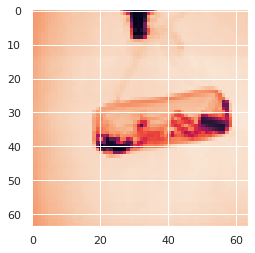

In [ ]:
pyplot.imshow(image)
pyplot.show()

In [ ]:
path1 = "/MyDrive/mlCapstone/Dangerous"
path2 = "/MyDrive/mlCapstone/NotDangerous"
imgsD = []
imgsN = []

In [ ]:
for dirpath, dirnames, filenames in os.walk(dan):
    for filename in filenames:
        if filename.endswith('.png'):
            imageR = Image.open(os.path.join(dirpath, filename))
            imageR = img_to_array(imageR)
            imageR = np.reshape(imageR, (-1,64))
            imgsD.append(imageR)

In [ ]:
for dirpath, dirnames, filenames in os.walk(ndan):
    for filename in filenames:
        if filename.endswith('.png'):
            imageR = Image.open(os.path.join(dirpath, filename))
            imageR = img_to_array(imageR)
            imageR = np.reshape(imageR, (-1,64))
            imgsN.append(imageR)

In [ ]:
len(imgsD)

9711

In [ ]:
len(imgsN)

11267

In [ ]:
print(imgsD[3])

[[ 17. 214. 243. ... 166. 165. 163.]
 [ 25. 221. 242. ... 165. 165. 164.]
 [ 30. 224. 242. ... 166. 164. 163.]
 ...
 [240. 240. 240. ... 239. 239. 239.]
 [240. 240. 240. ... 240. 240. 240.]
 [240. 240. 240. ... 240. 240. 240.]]


In [ ]:
imgsD[3].shape

(64, 64)

In [ ]:
imgsN[3].shape

(64, 64)

In [ ]:
ones = []
t = 0
while t <9711:
  ones.append(1)
  t = t +1
zeros = []
t = 0
while t <11267:
  zeros.append(0)
  t = t +1

In [ ]:
Ydata = ones + zeros
Ydata = np.asarray(Ydata)
Xdata = imgsD + imgsN
Xdata = np.asarray(Xdata)

SXdata = Xdata
SYdata = Ydata
CXdata = Xdata
CYdata = Ydata

In [ ]:
Xdata.shape

(20978, 64, 64)

In [ ]:
CXdata = CXdata.reshape(20978, 64, 64, 1)

In [ ]:
num_classes = 2
CYdata = tf.keras.utils.to_categorical(CYdata, num_classes)

In [ ]:
len(Xdata)

20978

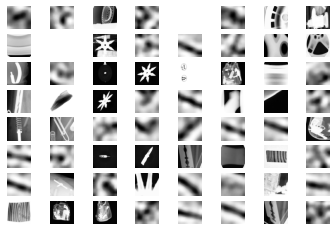

In [ ]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(Xdata[randint(0, Xdata.shape[0])], cmap='Greys')

#Multilayer NN

In [ ]:
image_size = 4096
Xdata = Xdata.reshape(Xdata.shape[0], image_size)


In [ ]:
num_classes = 2
Ydata = tf.keras.utils.to_categorical(Ydata, num_classes)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25, random_state=1)

In [ ]:
model = Sequential()

model.add(Dense(units=4096, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=4096, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              16781312  
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 2)                 8194      
                                                                 
Total params: 33,570,818
Trainable params: 33,570,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, epochs=10, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

Epoch 1/10
142/142 [==============================] - 52s 359ms/step - loss: 1.7662 - accuracy: 0.5490 - val_loss: 1.2108 - val_accuracy: 0.6080
Epoch 2/10
142/142 [==============================] - 51s 357ms/step - loss: 0.5472 - accuracy: 0.7730 - val_loss: 0.3731 - val_accuracy: 0.8259
Epoch 3/10
142/142 [==============================] - 51s 358ms/step - loss: 0.3012 - accuracy: 0.8914 - val_loss: 0.3603 - val_accuracy: 0.8367
Epoch 4/10
142/142 [==============================] - 51s 359ms/step - loss: 0.3836 - accuracy: 0.8422 - val_loss: 0.2153 - val_accuracy: 0.9409
Epoch 5/10
142/142 [==============================] - 51s 360ms/step - loss: 0.2877 - accuracy: 0.8948 - val_loss: 0.3940 - val_accuracy: 0.8183
Epoch 6/10
142/142 [==============================] - 51s 358ms/step - loss: 0.4498 - accuracy: 0.8260 - val_loss: 0.1839 - val_accuracy: 0.9498
Epoch 7/10
142/142 [==============================] - 51s 357ms/step - loss: 0.3464 - accuracy: 0.8673 - val_loss: 0.1928 - val_ac

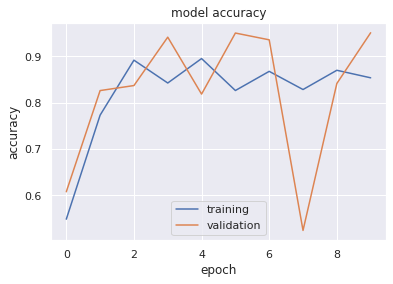

Test loss: 0.198
Test accuracy: 0.939


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2715   81]
 [ 238 2211]]


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2715,   81],
       [ 238, 2211]])

Text(0.5, 510.88, 'Predicted label')

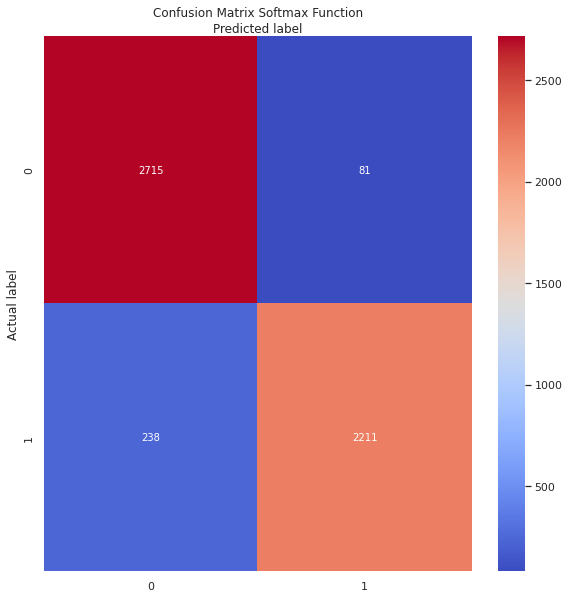

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Softmax Function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Suppor Vector Machine

In [ ]:
SXdata.shape

(20978, 64, 64)

In [ ]:
image_size = 4096
SXdata = SXdata.reshape(Xdata.shape[0], image_size)

In [ ]:
SXdata.shape

(20978, 4096)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(SXdata, SYdata, test_size=0.2, random_state=100)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

workingSVC = SVC(kernel='rbf', C=1)
workingSVC.fit(X_train,y_train)

SVC(C=1)

In [ ]:
y_pred = workingSVC.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2197
           1       0.97      0.95      0.96      1999

    accuracy                           0.96      4196
   macro avg       0.96      0.96      0.96      4196
weighted avg       0.96      0.96      0.96      4196



In [ ]:
y_pred = workingSVC.predict(X_test)
workingSVC.score(X_test, y_test)

0.9628217349857007

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2135,   62],
       [  94, 1905]])

Text(0.5, 510.88, 'Predicted label')

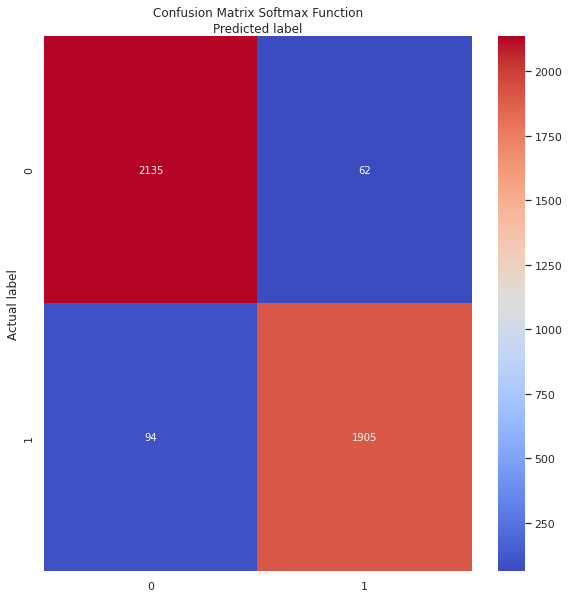

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Softmax Function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Improved CNN

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CXdata, CYdata, test_size=0.25, random_state=1)

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(64,64,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)



model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
convLayer03 = Activation('relu')
model.add(convLayer03)


model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dropout(0.1))
model.add(Dense(2))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 60, 60, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
X_train.shape

(15733, 64, 64, 1)

In [ ]:
train_generator = gen.flow(X_train, y_train, batch_size=128)
test_generator = test_gen.flow(X_test, y_test, batch_size=128)

In [ ]:
model.fit(train_generator, steps_per_epoch=13733//128, epochs=20, verbose=1,
                    validation_data=test_generator, validation_steps=2000//128)

Epoch 1/20
107/107 [==============================] - 252s 2s/step - loss: 0.1297 - accuracy: 0.9484 - val_loss: 0.6152 - val_accuracy: 0.7500
Epoch 2/20
107/107 [==============================] - 250s 2s/step - loss: 0.0828 - accuracy: 0.9678 - val_loss: 2.4122 - val_accuracy: 0.6026
Epoch 3/20
107/107 [==============================] - 253s 2s/step - loss: 0.0671 - accuracy: 0.9720 - val_loss: 1.8060 - val_accuracy: 0.5839
Epoch 4/20
107/107 [==============================] - 253s 2s/step - loss: 0.0595 - accuracy: 0.9727 - val_loss: 0.0667 - val_accuracy: 0.9672
Epoch 5/20
107/107 [==============================] - 252s 2s/step - loss: 0.0533 - accuracy: 0.9752 - val_loss: 0.0430 - val_accuracy: 0.9755
Epoch 6/20
107/107 [==============================] - 251s 2s/step - loss: 0.0488 - accuracy: 0.9760 - val_loss: 0.1000 - val_accuracy: 0.9604
Epoch 7/20
107/107 [==============================] - 252s 2s/step - loss: 0.0530 - accuracy: 0.9750 - val_loss: 0.1243 - val_accuracy: 0.9406

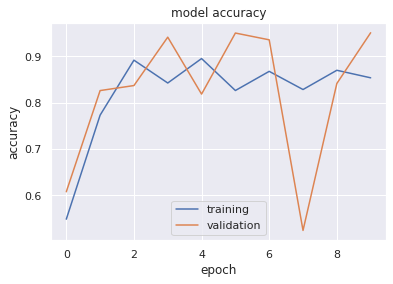

Test loss: 0.198
Test accuracy: 0.939


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2693  103]
 [  31 2418]]


Text(0.5, 510.88, 'Predicted label')

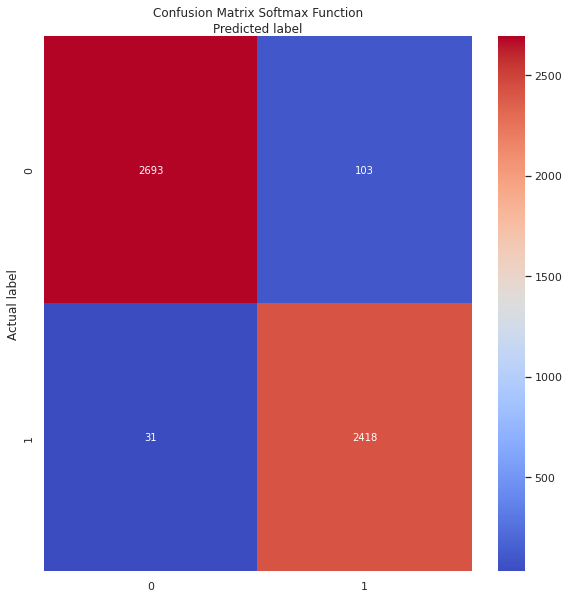

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Softmax Function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Convolutional Neural Network